In [131]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import os
import cv2
import json
import torch
import torch.nn as nn
import torch.nn.functional as fc 
import torch.optim as optim
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torchvision.io import read_image



warnings.filterwarnings('ignore')

In [111]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

In [112]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

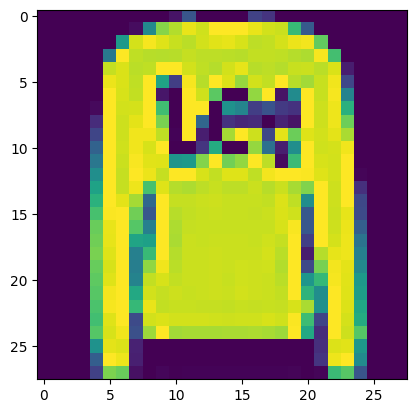

In [113]:
img_size = 28
num_images = 5
with open('data/FashionMNIST/raw/t10k-images-idx3-ubyte','rb') as f: # r 읽기만
    header = f.read(16) # 앞에 16바이트는 헤더, 17번째 바이트부터 이미지를 가지고 있음
    buf = f.read(img_size*img_size*num_images)
    data = np.frombuffer(buf,dtype=np.uint8).astype(float)
    data = data.reshape(num_images, img_size, img_size, 1)
    image = np.asarray(data[1]).squeeze()
    plt.imshow(image)
    plt.show()

0


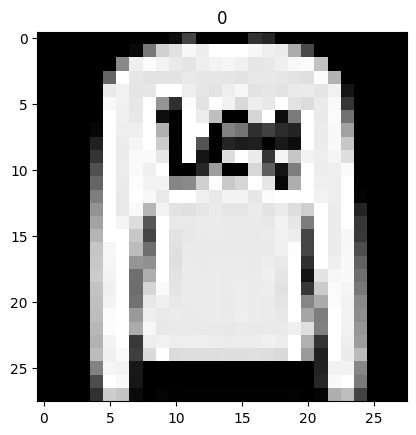

In [114]:
with open('data/FashionMNIST/raw/t10k-images-idx3-ubyte','rb') as f: # r 읽기만
    header = f.read(8) 
    buf = f.read(num_images)
    labels = np.frombuffer(buf,dtype=np.uint8).astype(np.int64)
    print(labels[1])

plt.title(f'{labels[1]}')
plt.imshow(image,'gray')
plt.show()    

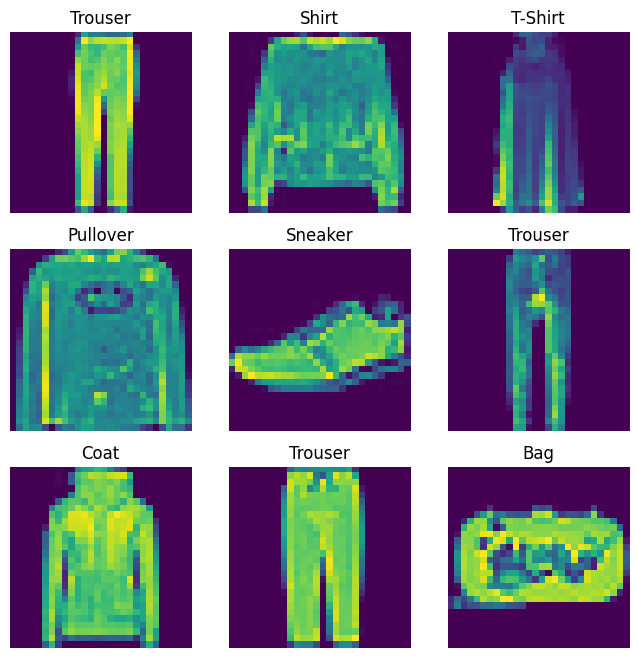

In [115]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3,3

for i in range(1,cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())

plt.show()    

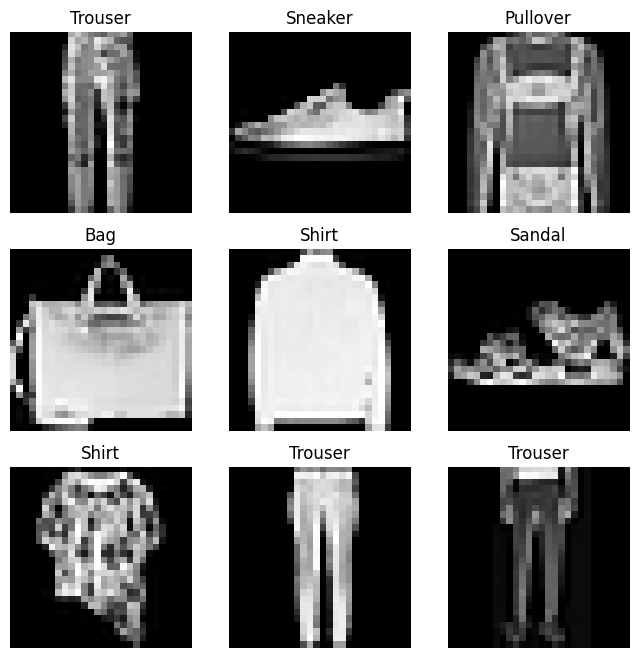

In [116]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3

for i in range(1,cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='gray')

plt.show()    

In [117]:
imgf = open('data/FashionMNIST/raw/train-images-idx3-ubyte','rb')
imgd = imgf.read(16)
lblf = open('data/FashionMNIST/raw/train-labels-idx1-ubyte','rb')
lbuf = lblf.read(8)

In [118]:
df_dict = {
    'file_name': [],
    'label' : []   
}
idx = 0

In [119]:
img_size = 28
num_images = 5

while True:
    imgd = imgf.read(img_size*img_size)
    if not imgd:
        break
    data = np.frombuffer(imgd, dtype=np.uint8).astype(float)
    data = data.reshape(1, img_size, img_size, 1)
    image = np.asarray(data).squeeze()
    lbld = lblf.read(1)
    labels = np.frombuffer(lbld, dtype=np.uint8).astype(np.int64)
    file_name = f'{idx}.png' 
    idx+=1 
    
    # 6만장의 데이터 저장
    cv2.imwrite(f'/Development/practice/01.practice/data/FashionMNIST/imgs/{file_name}',image)
    df_dict['label'].append(labels[0])
    df_dict['file_name'].append(file_name)
    
    

In [120]:
df = pd.DataFrame(df_dict)
print(df)
df.to_csv('/Development/practice/01.practice/data/FashionMNIST/annotations.csv')

       file_name  label
0          0.png      9
1          1.png      0
2          2.png      0
3          3.png      3
4          4.png      0
...          ...    ...
59995  59995.png      5
59996  59996.png      1
59997  59997.png      3
59998  59998.png      0
59999  59999.png      5

[60000 rows x 2 columns]


In [121]:
annotations_file = './data/FashionMNIST/annotations.csv'
mnist_data = pd.read_csv(annotations_file, names=['file_name','label'],skiprows=[0])


In [122]:
print(len(mnist_data))
print(len(os.listdir('./data/FashionMNIST/imgs')))
img_dir = './data/FashionMNIST/imgs/'

60000
60000


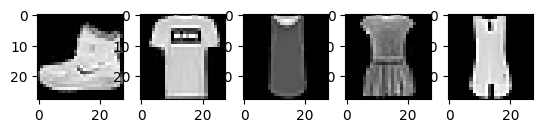

In [123]:
for i in range(5):
    file_name, label = mnist_data.iloc[i]
    img = cv2.imread(os.path.join(img_dir, file_name))
    plt.subplot(1,5,i+1)
    plt.imshow(img,'gray')
    